In [1]:
import prody as pd

In [2]:
#Load reference structure
structure1 = '/home/lmacaya/Escritorio/g33_Aleikar/g33_NAMD/g33_eq.pdb' #Modificar ruta de archivo

In [3]:
#Load trajectory file (.dcd)
trj1 = '/home/lmacaya/Escritorio/g33_Aleikar/g33_NAMD/g33_wbiones_md.dcd' #Modifcar ruta de archivo
trj2 = '/home/lmacaya/Escritorio/g33_Aleikar/g33_NAMD/g33_wbiones_md_1.dcd'
trj3 = '/home/lmacaya/Escritorio/g33_Aleikar/g33_NAMD/g33_wbiones_md_2.dcd'

In [4]:
class RMSF:
    def __init__(self, name):
        """get RMSF from trajectory and RMSF per residue plot"""
        self.name = name
    def get_RMSF(self, structure, trj):
        import pylab
        import prody as pd
        pylab.ion()
        
        structure = pd.parsePDB(structure) 
        trj = pd.parseDCD(trj)
        
        trj.setAtoms(structure.calpha)
        trj.setCoords(structure)
        trj.superpose()
        
        rmsf = trj.getRMSFs()
        
        return trj, rmsf
    
    def RMSF_plot(self, ens, rmsf, mdsTime):
        %matplotlib inline
        import pylab
        import matplotlib.pyplot as plt
        import numpy as np
        
        fig, ax = plt.subplots()
        
        ax.plot(rmsf, "b-", linewidth = 1, alpha = 0.8, label = "RMSF %s" % self.name)

        ax.set_xlabel("Residue number")
        ax.set_ylabel("RMSF ($\AA$)")
        ax.set_title("RMSF %s C-alpha" % self.name)
        ax.legend(loc=2)
        fig.savefig('/home/lmacaya/Escritorio/RMSF_%s' % self.name, dpi=1000)
        return

In [5]:
protein = RMSF('g33')

In [7]:
rmsf = protein.get_RMSF(structure1, trj1)

@> 92106 atoms and 1 coordinate set(s) were parsed in 0.44s.
@> DCD file contains 2000 coordinate sets for 92106 atoms.
@> DCD file was parsed in 29.73 seconds.
@> 2108.29 MB parsed at input rate 70.91 MB/s.
@> 2000 coordinate sets parsed at input rate 67 frame/s.
@> Superposition completed in 6.34 seconds.


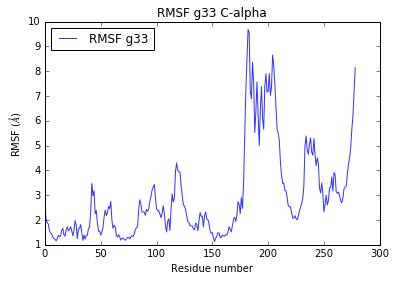

In [10]:
numConf = rmsf[0]
rmsf = rmsf[1]

plot = protein.RMSF_plot(numConf, rmsf, 200.0)